# Biodiversity in National Parks

This project aims to answer a few questions about biodiversity in some of the USA's national parks.
The questions are as follows:

-How many species from each category are considered endangered? 

-What is the most common species from each sub-category of plant/animal? 

-Which park has the most unique species?

# Importing and Cleaning the Data

In [1]:
#importing libraries and dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reading in the observations csv and doing base cleaning
observations_df = pd.read_csv('data/observations.csv')

observations_df.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [3]:
#reading in the species_info csv and doing base cleaning
species_df = pd.read_csv('data/species_info.csv')

species_df.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [4]:
#merging the 2 df into one
biodiversity_df = observations_df.merge(species_df, on='scientific_name')

biodiversity_df.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,NaN


In [5]:
biodiversity_df['conservation_status'].unique()

array([nan, 'Species of Concern', 'Threatened', 'Endangered',
       'In Recovery'], dtype=object)

In [6]:
biodiversity_df['conservation_status'].fillna('Not Endangered', inplace=True)

biodiversity_df.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not Endangered
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not Endangered
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not Endangered
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not Endangered
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,Not Endangered


In [7]:
biodiversity_df['park_name'].unique()

array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Yellowstone National Park', 'Bryce National Park'], dtype=object)

In [8]:
categories = biodiversity_df['category'].unique()
categories = [x.lower() for x in categories]
categories.sort()
print(categories)

['amphibian', 'bird', 'fish', 'mammal', 'nonvascular plant', 'reptile', 'vascular plant']


In [9]:
#Zotko, M. (2019, October 23). make new dataframes from grouped dataframe automatically [web log]. https://stackoverflow.com/questions/58517606/make-new-dataframes-from-grouped-dataframe-automatically. 
category_groups = dict(biodiversity_df.groupby('category').__iter__())
amphibian, bird, fish, mammal, nonvascular_plant, reptile, vascular_plant = category_groups.values()

# How many species from each category are considered endangered?

In [10]:
def group_by_endangered(list_of_df):
    endangered_counts = []
    for df in list_of_df:
        a = df.groupby('conservation_status')
        b = a['scientific_name']
        if 'Endangered' in b.groups:
            c = b.count()['Endangered']
        else:
            c = 0
        endangered_counts.append(c)
    return endangered_counts

In [11]:
category_df_list = [amphibian, bird, fish, mammal, nonvascular_plant, reptile, vascular_plant]
endangered_count = group_by_endangered(category_df_list)

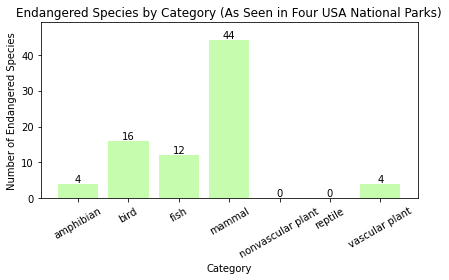

In [12]:
x_axis = np.arange(len(categories))
plt.bar(x_axis, endangered_count, color='#8ffa5f', alpha=0.5, align="center")

for i in range(len(endangered_count)):
    plt.annotate(str(endangered_count[i]), xy=(x_axis[i],endangered_count[i]), ha='center', va='bottom')
plt.ylim(0, max(endangered_count)+5)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, categories, rotation=30)
plt.title("Endangered Species by Category (As Seen in Four USA National Parks)")
plt.xlabel("Category")
plt.ylabel("Number of Endangered Species")

plt.tight_layout()
plt.savefig("Images/endangered_species_by_category.png", bbox_inches="tight")

plt.show()

# What is the most common species from each sub-category of plant/animal? 

In [13]:
def common_species(list_of_df):
    most_common_species = []
    for df in list_of_df:
        species = df.drop_duplicates(subset=['scientific_name', 'park_name', 'observations'], keep='first', inplace=False)
        df_groups = species.groupby('scientific_name')
        df_obvs = df_groups.sum('observations').sort_values('observations', ascending=False)
        top_df_count = df_obvs.iloc[0]
        top_df = df_groups.get_group(top_df_count.name)
        top_df.drop(['park_name', 'observations'], axis=1, inplace=True)
        df_species = top_df.iloc[0]
        df_species['total_observations'] = top_df_count.values[0]
        most_common_species.append(df_species)
    return most_common_species

In [14]:
category_df_list = [amphibian, bird, fish, mammal, nonvascular_plant, reptile, vascular_plant]
most_common_species = common_species(category_df_list)

C:\Users\Kaylie\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [15]:
most_common_species_df = pd.DataFrame(most_common_species)
most_common_species_df.reset_index(inplace=True)
most_common_species_df

,index,scientific_name,category,common_names,conservation_status,total_observations
0,3380,Rana catesbeiana,Amphibian,American Bullfrog,Not Endangered,1097
1,8240,Columba livia,Bird,Rock Dove,Not Endangered,1653
2,10268,Salvelinus fontinalis,Fish,Brook Trout,Not Endangered,1270
3,4640,Castor canadensis,Mammal,"American Beaver, Beaver",Not Endangered,1725
4,3120,Ulota crispa,Nonvascular Plant,Ulota Moss,Not Endangered,679
5,2892,Charina bottae,Reptile,Rubber Boa,Not Endangered,1144
6,13352,Holcus lanatus,Vascular Plant,"Common Velvet Grass, Velvetgrass",Not Endangered,1780


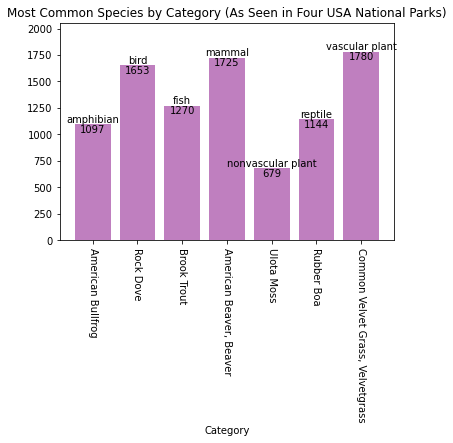

In [16]:
x_axis = np.arange(len(category_df_list))
y_axis = most_common_species_df['total_observations']
plt.bar(x_axis, y_axis, color='#800080', alpha=0.5, align="center")

for i in range(len(y_axis)):
    plt.annotate(str(categories[i]), xy=(x_axis[i],y_axis[i]), ha='center', va='bottom')
    plt.annotate(str(y_axis[i]), xy=(x_axis[i],y_axis[i]), ha='center', va='top')
plt.ylim(0, max(y_axis)+275)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, most_common_species_df['common_names'], rotation=-90)
plt.title("Most Common Species by Category (As Seen in Four USA National Parks)")
plt.xlabel("Category")


plt.savefig("Images/common_species_by_category.png", bbox_inches="tight")

plt.show()

# Which park has the most unique species?

In [17]:
park_groups = biodiversity_df.groupby('park_name')
smoky_mountains = park_groups.get_group('Great Smoky Mountains National Park')
yosemite = park_groups.get_group('Yosemite National Park')
yellowstone = park_groups.get_group('Yellowstone National Park')
bryce = park_groups.get_group('Bryce National Park')
parks = [smoky_mountains, yosemite, yellowstone, bryce]

In [18]:
non_zeroes = bryce[(bryce['observations'] != 0)].drop_duplicates(subset=['scientific_name', 'park_name', 'observations'], keep='first', inplace=False)
categories = non_zeroes.groupby('category')

lengths = {}
i = 0

for name, group in categories:
    unique_names = group['scientific_name'].unique()
    num_of_unique_species = len(group)
    lengths[name] = num_of_unique_species
    i += 1

print(lengths)

{'Amphibian': 80, 'Bird': 521, 'Fish': 127, 'Mammal': 214, 'Nonvascular Plant': 333, 'Reptile': 79, 'Vascular Plant': 4469}


In [19]:
def unique_by_park_by_category(df):
    non_zeroes = df[(df['observations'] != 0)].drop_duplicates(subset=['scientific_name', 'park_name', 'observations'], keep='first', inplace=False)
    categories = non_zeroes.groupby('category')

    lengths = {}
    i = 0

    for name, group in categories:
        unique_names = group['scientific_name'].unique()
        num_of_unique_species = len(group)
        lengths[name] = num_of_unique_species
        i += 1

    return lengths

In [20]:
parks_and_categories = []
park_names = ['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Yellowstone National Park', 'Bryce National Park']
i = 0
for park in parks:
    unique_species = unique_by_park_by_category(park)
    parks_and_categories.append(unique_species)

In [21]:
parks_and_categories_df = pd.DataFrame(parks_and_categories, index=park_names)
parks_and_categories_df.index.rename('Park Names', inplace=True)
parks_and_categories_df.reset_index(inplace=True)
parks_and_categories_df

,Park Names,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
0,Great Smoky Mountains National Park,80,521,127,214,333,79,4464
1,Yosemite National Park,80,521,127,214,333,79,4467
2,Yellowstone National Park,80,520,127,213,333,79,4467
3,Bryce National Park,80,521,127,214,333,79,4469


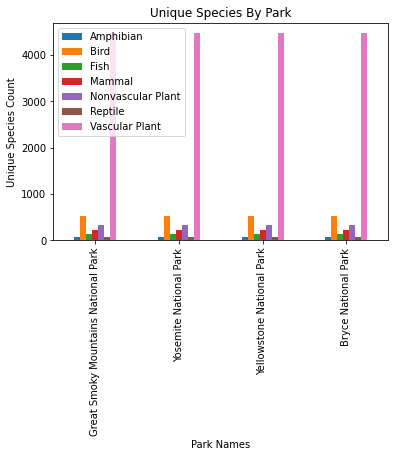

In [22]:
parks_and_categories_df.plot(x='Park Names',
                             kind='bar',
                             stacked=False,
                             title='Unique Species By Park',
                             ylabel='Unique Species Count' )

plt.savefig("Images/unique_species_by_park.png", bbox_inches="tight")